# Validate Video Data

Code authored by: Shaw Talebi<br>

Blog link: https://medium.com/towards-data-science/how-to-build-data-pipelines-for-machine-learning-b97bbef050a5 <br>
Video link: https://youtu.be/OnIQrDiTtRM

### imports

In [1]:
import polars as pl
import matplotlib.pyplot as plt

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


### read data

In [2]:
df = pl.read_parquet('data/video-transcripts.parquet')

### sizes

In [3]:
# shape + unique values
print("shape:", df.shape)
print("n unique rows:", df.n_unique())
for j in range(df.shape[1]):
    print("n unique elements (" + df.columns[j] + "):", df[:,j].n_unique())

shape: (84, 4)
n unique rows: 84
n unique elements (video_id): 84
n unique elements (datetime): 84
n unique elements (title): 84
n unique elements (transcript): 82


In [15]:
print("Total number of title characters:", sum(len(df['title'][i]) for i in range(len(df))))
print("Total number of transcript characters:", sum(len(df['transcript'][i]) for i in range(len(df))))

Total number of title characters: 4506
Total number of transcript characters: 890413


### dtypes

In [4]:
# change datetime to Datetime dtype
df = df.with_columns(pl.col('datetime').cast(pl.Datetime))
print(df.head())

shape: (5, 4)
┌─────────────┬─────────────────────┬───────────────────────────────┬──────────────────────────────┐
│ video_id    ┆ datetime            ┆ title                         ┆ transcript                   │
│ ---         ┆ ---                 ┆ ---                           ┆ ---                          │
│ str         ┆ datetime[μs]        ┆ str                           ┆ str                          │
╞═════════════╪═════════════════════╪═══════════════════════════════╪══════════════════════════════╡
│ eayzAZltV9U ┆ 2024-04-29 13:54:55 ┆ 4 Lessons from AI Consulting  ┆ are four things I've learned │
│             ┆                     ┆ #fr…                          ┆ fro…                         │
│ 03x2oYg9oME ┆ 2024-04-25 15:16:00 ┆ How to Manage Data Science    ┆ this video is part of a      │
│             ┆                     ┆ Proje…                        ┆ larger s…                    │
│ O5i_mMUM94c ┆ 2024-04-19 14:05:54 ┆ How I’d learned #datascience  ┆ here's 

#### character lengths

(array([ 3.,  4.,  8., 15., 11., 19., 12.,  9.,  1.,  2.]),
 array([16. , 23.8, 31.6, 39.4, 47.2, 55. , 62.8, 70.6, 78.4, 86.2, 94. ]),
 <BarContainer object of 10 artists>)

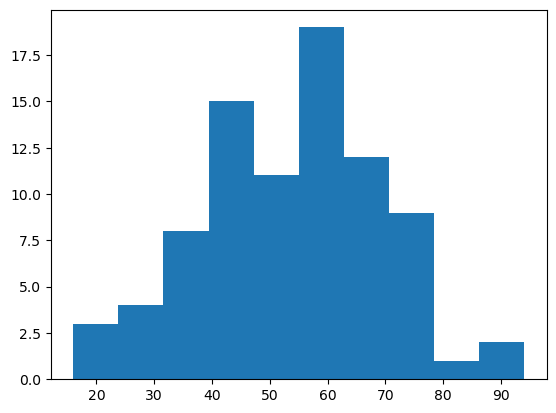

In [5]:
# lengths/character counts
plt.hist(df['title'].str.len_chars())

(array([31.,  9., 20., 11.,  7.,  2.,  2.,  1.,  0.,  1.]),
 array([3.00000e+00, 5.00620e+03, 1.00094e+04, 1.50126e+04, 2.00158e+04,
        2.50190e+04, 3.00222e+04, 3.50254e+04, 4.00286e+04, 4.50318e+04,
        5.00350e+04]),
 <BarContainer object of 10 artists>)

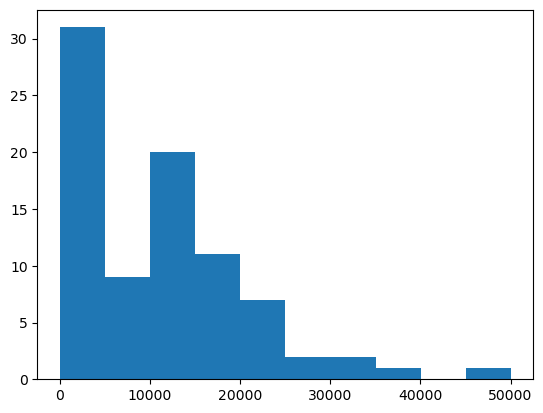

In [6]:
plt.hist(df['transcript'].str.len_chars())

### handling special strings

In [7]:
print(df['title'][3])
print(df['transcript'][3])

4 Skills You Need to Be a Full-Stack Data Scientist
although it is common to delegate different parts of the machine learning workflow to specialized roles there are many situations which require individuals who can manage and Implement ml Solutions end to end I call these individuals full stack data scientists in this video I will introduce full stack data science and discuss its four hats and if you're new here welcome I'm Shaw I make videos about data science and Entrepreneurship and if you enjoy this content please consider subscribing that's a great no cost way you can support me in all the videos that I make starting with the basic question what is a fullstack data scientist so the way I'll Define it here is that a full stack data scientist is someone who can manage and Implement an ml solution from end to end in other words they have a sufficient understanding of the entire ml workflow which gives them a unique ability to bring ml solutions to reality so typical ml workflow migh

In [8]:
special_strings = ['&#39;', '&amp;', 'sha ']
special_string_replacements = ["'", "&", "Shaw "]

for i in range(len(special_strings)):
    df = df.with_columns(df['title'].str.replace(special_strings[i], special_string_replacements[i]).alias('title'))
    df = df.with_columns(df['transcript'].str.replace(special_strings[i], special_string_replacements[i]).alias('transcript'))

In [9]:
print(df['title'][3])
print(df['transcript'][3])

4 Skills You Need to Be a Full-Stack Data Scientist
although it is common to delegate different parts of the machine learning workflow to specialized roles there are many situations which require individuals who can manage and Implement ml Solutions end to end I call these individuals full stack data scientists in this video I will introduce full stack data science and discuss its four hats and if you're new here welcome I'm Shaw I make videos about data science and Entrepreneurship and if you enjoy this content please consider subscribing that's a great no cost way you can support me in all the videos that I make starting with the basic question what is a fullstack data scientist so the way I'll Define it here is that a full stack data scientist is someone who can manage and Implement an ml solution from end to end in other words they have a sufficient understanding of the entire ml workflow which gives them a unique ability to bring ml solutions to reality so typical ml workflow migh

### write data

In [10]:
# write data to file
df.write_parquet('data/video-transcripts.parquet')
df.write_csv('data/video-transcripts.csv')